
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What are the factors can affect your decision to show up for your medical appointment, what if you are far away from your 
hospital can the Scholarship changes your mind? 

> This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included like: Gender, Age, Neighbourhood, Scholarship, SMS_received and more other detils.

> 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('medical_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## NOTE
Here, there is an obvious mistake as the minimum age is minus,,
Max age : 115 years

In [7]:
#The number of rows is equal to the total number of patients
df.shape

(110527, 14)


### Data Cleaning (Replace this with more specific notes!)

In [8]:
#Firstly I will drop the columns of PatientId and appointment day cause i will not use them in my analyis
df.drop(['PatientId','AppointmentID'], axis=1, inplace= True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#I will delete the time and keep only the date in appointment day and scheduledday columns to get the difference between them 
#and see if the gap between the two dates affect the patient decision to come 

for col in ["AppointmentDay", "ScheduledDay"]:
    df[col] = df[col].apply(lambda x: x.split("T")[0])
    

In [10]:
#As The type of appointment day and scheduled day is object i will convert it to date
for col in ["ScheduledDay", "AppointmentDay"]:
    df[col] = pd.to_datetime(df[col])

In [12]:
# To be able to visualize how showed up for their appointment and who
# didn't, I will rename no_show column to Show and replace (No) by 1 
# and (Yes) by 0, then 1 means that the patient have come(No of No_Show) and 0 means he
# haven't come
df.rename(columns= {"No-show":"Show"}, inplace= True)
labels = {"No":1, "Yes":0}
df["Show"] = df["Show"].map(labels)
df["Show"] = df["Show"].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  Show            110527 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(7), object(2)
memory usage: 9.7+ MB


In [14]:
#Now, I will use rename method to change some columns names due to their miss spelling or to avoid any mess
df.rename(columns={'No-show':'No_Show','Hipertension':'Hypertension'}, inplace= True)

In [15]:
#I Will drop the row of the patient having age with minus 
#firtly i will search for rows have age less than zero
df[df["Age"] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [16]:
#Then I will drop it
df.drop(99832, inplace= True)

In [17]:
#Making Sure that it was removed
df[df["Age"] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


In [18]:
#Before Visualizing Data, I Will Drop Appointment Day and Scheduled Day Coulmns as i will nt use them, i only will need the
#delay column which i create from the difference between them 
df.drop(['ScheduledDay','AppointmentDay'], axis= 1, inplace= True)

# Data Visualization 
### General Look on all Data
#### I Will Use hist function to plot all varibles and try to get pattes

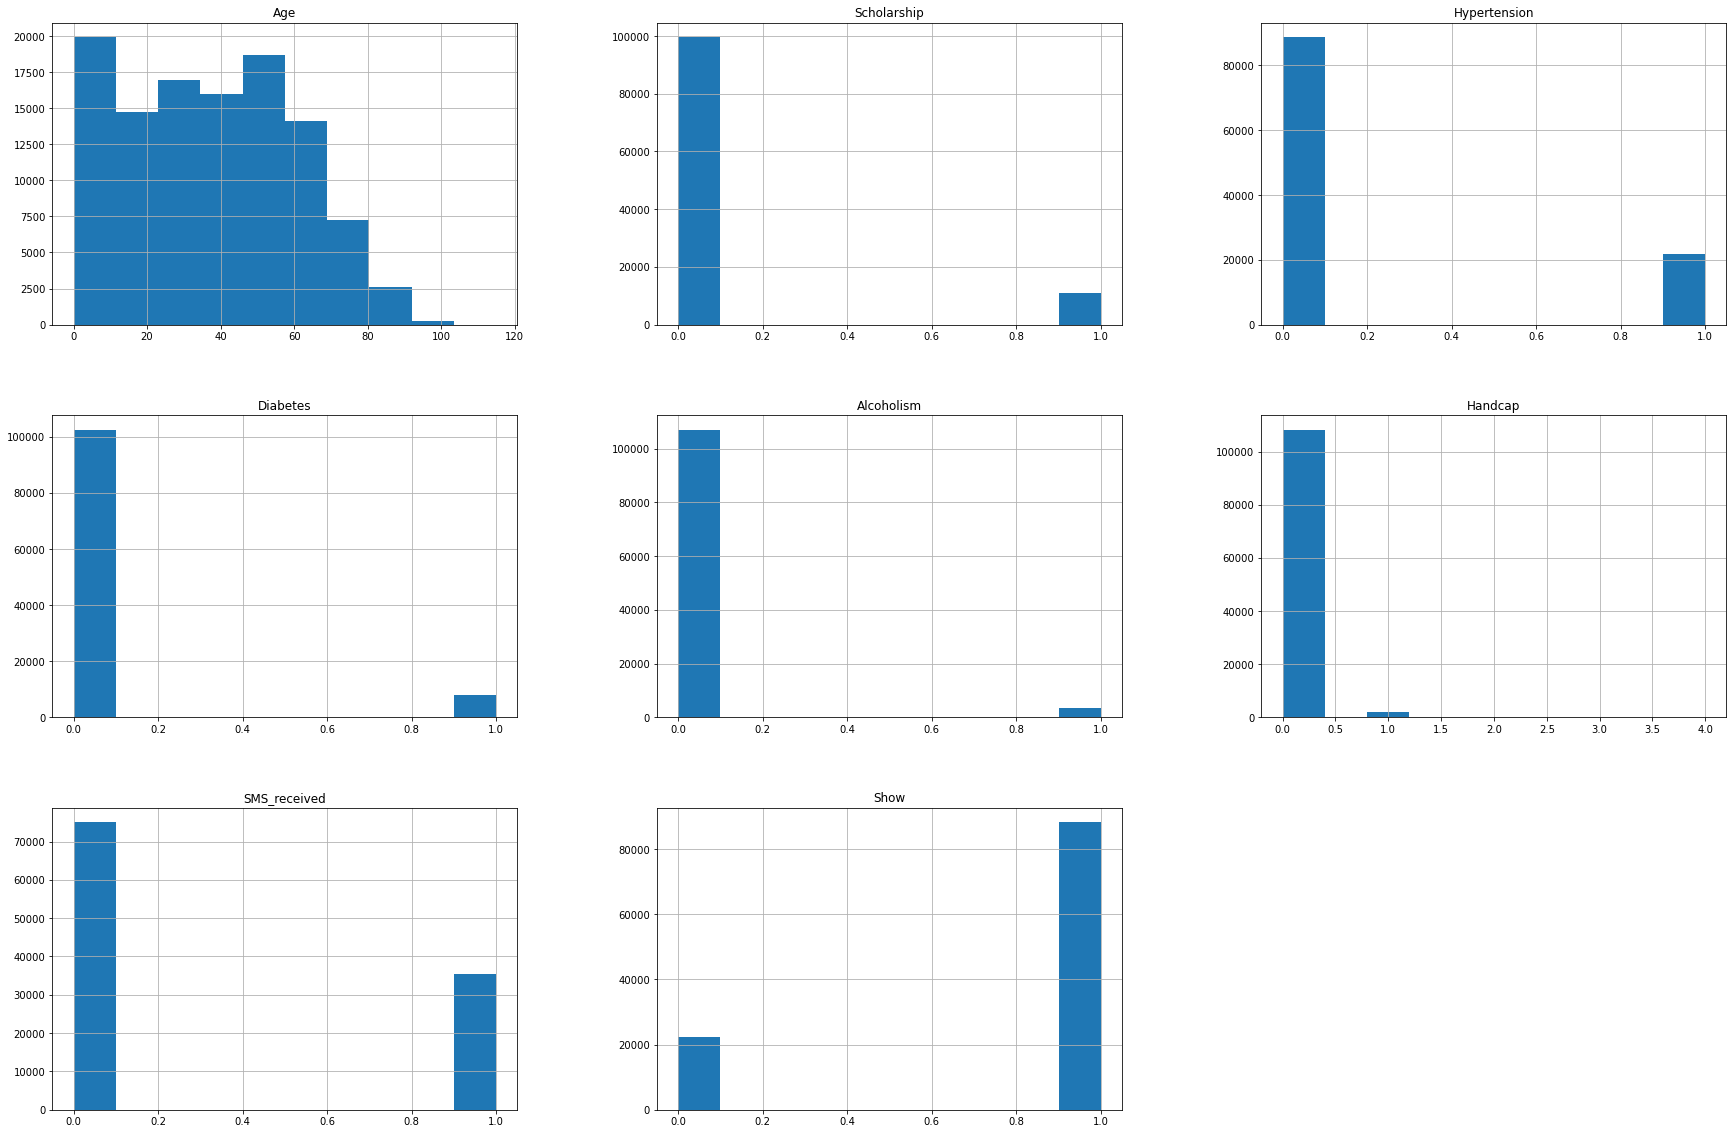

In [19]:
df.hist(figsize= (30,20));

## The Data Visualiztion shows us that 
Most of Patients are between 0 - 45 years old.

Most of patients are not enrolled in the scholarship.

Most of patients don't complain of chronic diseases (like: diabetes, hypertension, handcap)

Also there is a strange notice that most of patients who have come didn't recieve a message to remind them with their appointment

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does The Scholrship affect patients attendance?)

Text(0, 0.5, 'Show')

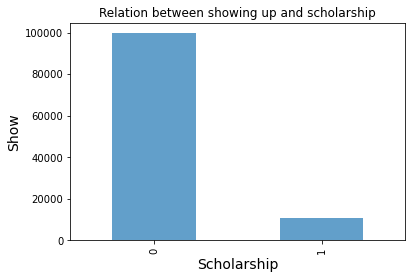

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
scholar_effect = df.groupby('Scholarship')['Show'].count()
scholar_effect.plot(kind= 'bar', title= 'Relation between showing up and scholarship', alpha = 0.7);
plt.xlabel('Scholarship', fontsize= 14)
plt.ylabel('Show', fontsize= 14)

### Nearly 950000 patients had show up for their appointment and they are not enrolled in the scolarship

 It's clear that the Scholarship didn't affect the attenance of patients as a big number of who has come, had not have a scholarsip
then Scholarship is not significant sign

### Research Question 2  (Does Recieving a message or not affects patients attendance?)

Text(0, 0.5, 'Show')

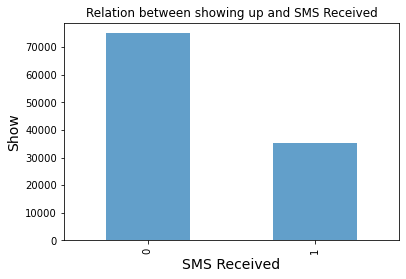

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
scholar_effect = df.groupby('SMS_received')['Show'].count()
scholar_effect.plot(kind= 'bar', title= 'Relation between showing up and SMS Received', alpha = 0.7);
plt.xlabel('SMS Received', fontsize= 14)
plt.ylabel('Show', fontsize= 14)

### Nearly 70000 patients had show up for their appointment and they didn't recieve a reminding sms
 It's clear that recieving sms didn't affect the attenance of patients as a big number of who has come, had not recieved a sms 
 then sms recieving is not significant sign

Text(0, 0.5, 'Show')

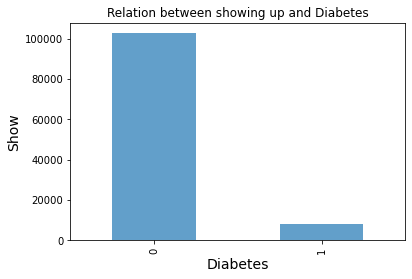

In [43]:
diabetes_effect = df.groupby('Diabetes')['Show'].count()
diabetes_effect.plot(kind= 'bar', title= 'Relation between showing up and Diabetes', alpha = 0.7);
plt.xlabel('Diabetes', fontsize= 14)
plt.ylabel('Show', fontsize= 14)

### Nearly 950000 patients had show up for their appointment and they don't complains of diabetes
 It's also clear that daibetes didn't affect the attenance of patients as a big number of who has come, were not diabetics

### Research Question 3  (Does the patient's city  affects its attendance?)

In [44]:
show = (df.Show == 1)
no_show = (df.Show == 0)

In [45]:
df[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
Show             88207
dtype: int64

In [46]:
df[no_show].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
Show             22319
dtype: int64

Text(0, 0.5, 'Show Counts')

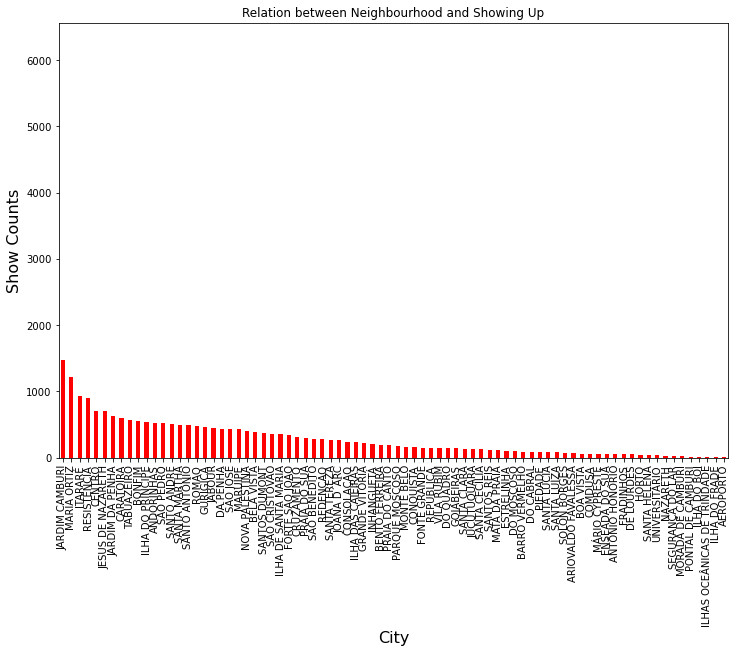

In [51]:
plt.figure(figsize=[12,8])
df.Neighbourhood[show].value_counts().plot(kind= 'bar', color= 'white', label= 'show')
df.Neighbourhood[no_show].value_counts().plot(kind= 'bar', color= 'red', label= 'no_show', title = 'Relation between Neighbourhood and Showing Up')
plt.xlabel('City', fontsize= 16)
plt.ylabel('Show Counts', fontsize= 16)

### The Plot shows us that 
patients from some cities such: (JARDIM CAMBURI, MARIA ORTIZ) had show up for their appointment with a larger number than patients from cities such AEROPORIO, ILHADO FRADE

#### WE DON'T KNOW THE EXACT DISTANCE BETWEEN EACH CITY AND THE HOSPITAL BUT STII THE NEIGHBOURHOOD FORMS A SIGNIFICANT SIGN PATIENTS ATTENDANCE

<a id='conclusions'></a>
## Conclusions


### chronic diseases Impact
we didn't see a significant effect on patients attending due to complaining a choronic disease

### scholarship Impact
we didn't see a significant effect on patients attending due to scholarship enrolment

### SMS Impact
we didn't see a significant effect on patients attending due to recieving a reminding sms 

### Neighbourhood Impact
It's clear that neighbourhood had a significant effect on patients attending but due to lack of data we can't specify which cities are near from or far from the hospital

## Limitations
- couln't detect direct corrolation between patient attendance and many other information like gender and age
- couln't detect exact distances between patient's different cities and hospital

##### I See that as not expected some factors like scholarship and recieving sms or not didn't affect the percentage of patients attendance, but it's also clear that factor like the Neighbourhood had a significant effect on the  percentage of patients attendance